<a href="https://colab.research.google.com/github/flyaflya/persuasive/blob/main/demoNotebooks/compDecAnlayWalkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib daft --upgrade

# Computational Decision Analysis

> “It is rarely a mysterious technique that drives us to the top, but rather a profound mastery of what may well be a basic skill set.”
― Josh Waitzkin, The Art of Learning: A Journey in the Pursuit of Excellence

Let's strive to master the basic skillset of decision-making by framing decision problems using three key elements:

1.   __Uncertainty__:   _Uncertainty_ is modelled using collections of related random variables with assigned probability distributions; each plausible realization of a collection represents a "state of the world."  
1.  __Actions__:  A _decision_ or _action_ is an irrevocable commitment of resources that shape or restrict our possible futures. 
1.  __Objectives__:  An objective is a specified criteria by which preference orderings over all possible outcomes can be made.  


## The Newsvendor Example

![](https://esa.github.io/pagmo2/_images/newsvendor.png)

For this chapter, the three elements of decision analysis are demonstrated using the business model of a newsvendor (see @fig-newsv).  Our newsvendor takes advantage of a single opportunity to buy newspapers every morning and then seeks to sell them on a city corner throughout the day.  Our newsvendor's goal is to match his morning purchase of papers to the demand that gets realized throughout the day.  Too many papers and the newsvendor gets stuck with a pile of worthless paper; too few papers and the newsvendor misses out on profit.

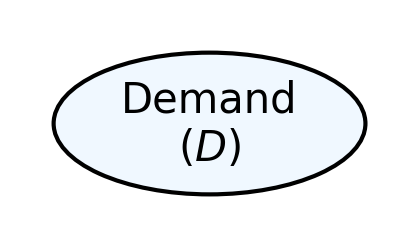

In [4]:
#@title Uncertainty
import daft
from functools import partialmethod

class dag(daft.PGM):
    def __init__(self, *args, **kwargs):
        daft.PGM.__init__(self, *args, **kwargs)
    
    obsNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'cadetblue'})
    decNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, shape = "rectangle", plot_params = {'facecolor': 'thistle'})
    detNode = partialmethod(daft.PGM.add_node, aspect = 4.5, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNode = partialmethod(daft.PGM.add_node, scale = 1.2, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    detNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    
pgm = dag(dpi = 300, alternate_style="outer")
pgm.latNode("d","Demand\n"+r"$(D)$",2,1)
pgm.show()

Since we have not covered too many probability distributions, imagine a scenario where the newsvendor has access to exactly 200 potential customers and each potential customer has a 20% chance of purchase.  Hence, we can now justifiably assume  demand is binomial:

$$
\begin{aligned}
D &\equiv \textrm{Daily demand for newspapers, and}\\
D &\sim \textrm{Binomial}(n=200,p=0.2).
\end{aligned}
$$

And lastly, our computational representation of demand will be a representative sample using 100 simulated draws (usually representative samples will require a few thousand or more draws):






In [ ]:
from numpy.random import default_rng
import pandas as pd

potentialCusts = 200
purchaseProb = 0.2

rng = default_rng(seed = 111) 
numSims = 100

# create data frame to store simulated demand
newsDF = pd.DataFrame({"simNum": range(1, numSims+1),  # sequence of 1 to 100
                   "demand": rng.binomial(n = potentialCusts, 
                                          p = purchaseProb,
                                          size = numSims)})

# view first few 5 rows of newsDF
newsDF.iloc[:5,:]

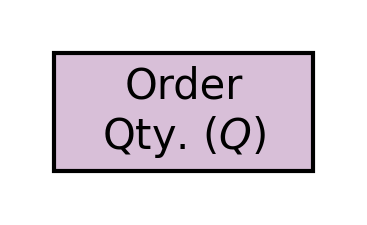

In [6]:
#@title Actions
import daft
from functools import partialmethod

class dag(daft.PGM):
    def __init__(self, *args, **kwargs):
        daft.PGM.__init__(self, *args, **kwargs)
    
    obsNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'cadetblue'})
    decNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, shape = "rectangle", plot_params = {'facecolor': 'thistle'})
    detNode = partialmethod(daft.PGM.add_node, aspect = 4.5, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNode = partialmethod(daft.PGM.add_node, scale = 1.2, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    detNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    
pgm = dag(dpi = 300, alternate_style="outer")
pgm.decNode("q","Order\n"+r"Qty. $(Q)$",2,1)
pgm.show()

the _discrete-choice_ newsvendor model:

$$
\begin{aligned}
Q &\equiv \textrm{Order quantity chosen by decision-maker, where}\\
Q &\in \{0, 1, 2, \ldots, 200\}.
\end{aligned}
$$

the _continuous-choice_ model where:

$$
Q \in \{q | q \in \mathbb{R}, 0 \leq q \leq 200\}
$$




## Objectives

![](https://github.com/flyaflya/persuasive/raw/main/images/rowing.png)




Quantifiying objectives in math is really hard.  Bill Simmons was particularly unhappy with how coaches in the NFL have been making decisions by listening to their analytics people.

> With about four minutes left in a game tied at 20 and the Ravens facing a 4th-and-goal from the 2, Harbaugh opted for the field goal to take the lead like every other coach in history would do ... except that’s not what happened.  Harbaugh decided to go for it, and not only that, he had Lamar Jackson throw the ball and it was intercepted in the end zone. Not only did the Ravens not score, they did the one thing that they couldn’t: turn it over in the end zone so that they were not able to pin the Bills down inside the 2.

![](https://github.com/flyaflya/persuasive/raw/main/images/Screenshot%202022-10-27%20163903.png)

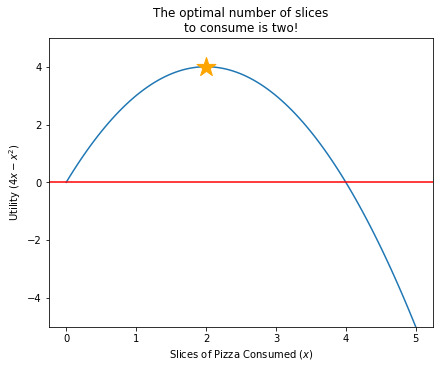

In [11]:
#@title My Utility Function for Consuming Pizza
# !pip install matplotlib --upgrade
from numpy import linspace
import matplotlib.pyplot as plt
import pandas as pd

# create pandas dataframe from a dictionary
df = pd.DataFrame({"consumedPizza": linspace(0,5,100)})
df["utility"] = 4 * df.consumedPizza - df.consumedPizza**2

## plot the results using matplotlib object-oriented interface
fig, ax = plt.subplots(figsize = [6,5], layout = "constrained")
ax.plot("consumedPizza","utility", data = df)
ax.scatter(2,4, s= 400, marker = "*", c = "orange", zorder=2) ## star the optimal
ax.axhline(0, color = "red")
ax.set_ylim(-5,5);
ax.set_xlabel("Slices of Pizza Consumed" + r" ($x$)")
ax.set_ylabel("Utility" + r" ($4x-x^2$)")
ax.set_title("The optimal number of slices\nto consume is two!")
plt.show()

$$
\begin{aligned}
x &\equiv \textrm{Slices of pizza consumed}\\
u(x) &= 4x - x^2
\end{aligned}
$$

where our goal to maximize utility by choosing among all possible _continuous_ values of $x$,

$$
\max_{0 \leq x \leq 200} u(x) = \max_{0 \leq x \leq 200} \left(4x - x^2\right).
$$

### Question for you

Assume you eat less than me and that your utility function is:
$$
\begin{aligned}
x &\equiv \textrm{Slices of pizza consumed}\\
u(x) &= 4x - 2*x^2
\end{aligned}
$$

Modify the code that made the above plot and highlight the new optimal amount of pizza to consume.





In [ ]:
### here is the code to modify
# !pip install matplotlib --upgrade
from numpy import linspace
import matplotlib.pyplot as plt
import pandas as pd

# create pandas dataframe from a dictionary
df = pd.DataFrame({"consumedPizza": linspace(0,5,100)})
df["utility"] = 4 * df.consumedPizza - df.consumedPizza**2

## plot the results using matplotlib object-oriented interface
fig, ax = plt.subplots(figsize = [6,5], layout = "constrained")
ax.plot("consumedPizza","utility", data = df)
ax.scatter(2,4, s= 400, marker = "*", c = "orange", zorder=2) ## star the optimal
ax.axhline(0, color = "red")
ax.set_ylim(-5,5);
ax.set_xlabel("Slices of Pizza Consumed" + r" ($x$)")
ax.set_ylabel("Utility" + r" ($4x-x^2$)")
ax.set_title("The optimal number of slices\nto consume is two!")
plt.show()

*Just say no to hand-derived calculus*

#### Numerical Optimization Using Gradients

* __Define a Utility Function:__ Define a mathematical function of utility given input of how many slices of pizza you will eat.
* __Initialize Input Values:__ Pick some number of slices of pizza to simulate eating.  
* __Calculate how utility might change:__ Calculate how utility would change if we eat just slightly more pizza than we chose to eat in step 2.
* __Choose a New Input Value:__ If utility increases with a little more pizza, repeat steps 2 and 3 using a slightly higher simulated value of slices to eat.  Similarly, if utility decreases, repeat steps 2 and 3 using a slightly lower simulated value of slices to eat. 
* __Iterate Until Satisfied With Result:__ Repeat steps 2-4 until changes in utility are not practically relevant.  

**Step1 - Define a Utility Function**

In [ ]:
from jax import grad
import jax.numpy as jnp
import pandas as pd

## write utility function in Python
def utilityFunction(x):
    # x represents number of consumed pizza slices
    utility = 4*x - x**2   # x**2 is the square of x
    return utility

## check it works, e.g. for u(1) should = 3
print(utilityFunction(1))


__Step2 - Initialize Input Values:__ 

In [ ]:
simNum = 1
xValue = 1
df = pd.DataFrame({"simNum": [simNum], "x": [xValue],
                   "utility": utilityFunction(xValue)})
df

__Step3 - Calculate how utility might change:__ 

Gradient:

$$
\nabla f(x,y,z) = \left[\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right]
$$

For our pizza example:

$$
\begin{aligned}
\nabla u(x) &= \left[\frac{\partial{u}}{\partial{x}}(x)\right]\\
&= 4 - 2x \\
\implies \nabla u(1) &= 2
\end{aligned}
$$

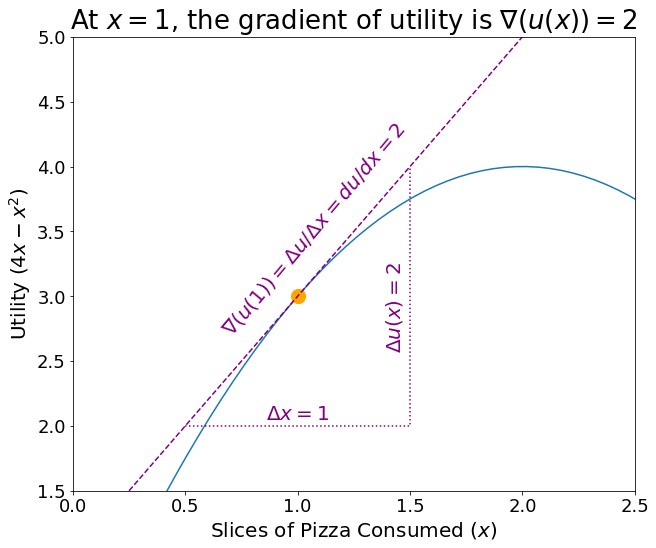

In [18]:
#@title Showing how gradient is just a slope
from numpy import linspace
import matplotlib.pyplot as plt
import pandas as pd

# create pandas dataframe from a dictionary
plotDF = pd.DataFrame({"consumedPizza": linspace(0,5,100)})

plotDF["utility"] = 4 * plotDF.consumedPizza - plotDF.consumedPizza**2

## plot the results using matplotlib object-oriented interface
fig, ax = plt.subplots(figsize = [9,7.5], layout = "constrained")
ax.plot("consumedPizza","utility", data = plotDF)
ax.scatter(1,3, s= 200, marker = "o", c = "orange", zorder=2) ## star the optimal
ax.axhline(0, color = "red")
ax.set_xlim(0.,2.5);
ax.set_ylim(1.5,5);
ax.set_xlabel("Slices of Pizza Consumed" + r" ($x$)", fontsize=20)
ax.set_ylabel("Utility" + r" ($4x-x^2$)", fontsize=20)
ax.set_title(r"At $x=1$, the gradient of utility is $\nabla\left(u(x)\right)=2$", fontsize=26)
#ax.plot([1,1],[0,3],linestyle='dashed')
#ax.annotate(r"$\nabla\left(u(1)\right)=[dy/dx]=[2]$", xy = (1,3), xytext = (1.75,4.5), 
 #           xycoords = "data", horizontalalignment='center',
  #          arrowprops = dict(arrowstyle = "<-", color = "black"))
ax.axline(xy1 = (1,3), slope = 2, color = "purple", linestyle = "dashed")
ax.text(x=0.65,y=2.7,s=r"$\nabla\left(u(1)\right)=\Delta u / \Delta x = du/dx = 2$", color = "purple", rotation = 50, fontsize=20)
ax.plot([1-0.5,2-0.5,2-0.5],[3-1,3-1,5-1],linestyle='dotted', color = "purple")
ax.text(x=1,y=2.05,s=r"$\Delta x=1$", color = "purple", ha = "center", fontsize=20)
ax.text(x=1.43,y=2.6,s=r"$\Delta u(x)=2$", color = "purple", ha = "center", rotation  = 90, fontsize=20)
ax.tick_params(labelsize=18)
plt.show()

The good news is that we do not have to know or remember calculus to get the slope of the utility function.  Python's `jax` package can calculate slopes, i.e. gradients, for us. We do that here using the `grad` function from the `jax` package: 

In [ ]:
## define gradient of u(x) (i.e. the slope)
utilityFunction_dx = grad(utilityFunction);

## show gradient (slope) at various x-values
x = 1.  ## needs to be float

## add gradient column to dataframe
gradient = utilityFunction_dx(x)
df["gradient"] = gradient.item()  ##ARGH: convert device array to scalar
df

__Step4 - Choose a New Input Value:__ :

In [ ]:
## increment simulation number
simNum = simNum + 1

## step size
stepSize = 0.2

## decide which x to try next
if gradient >= 0:
  xValue = xValue + stepSize
else:
  xValue = xValue - stepSize

## get variable values for new row
utility = utilityFunction(xValue)
gradient = utilityFunction_dx(xValue).item()
newRow = pd.Series({"simNum": simNum,
                    "x": xValue,
                    "utility": utility,
                    "gradient": gradient})

## Append single new row to dataframe
df = pd.concat([df, newRow.to_frame().T], ignore_index = True)
df

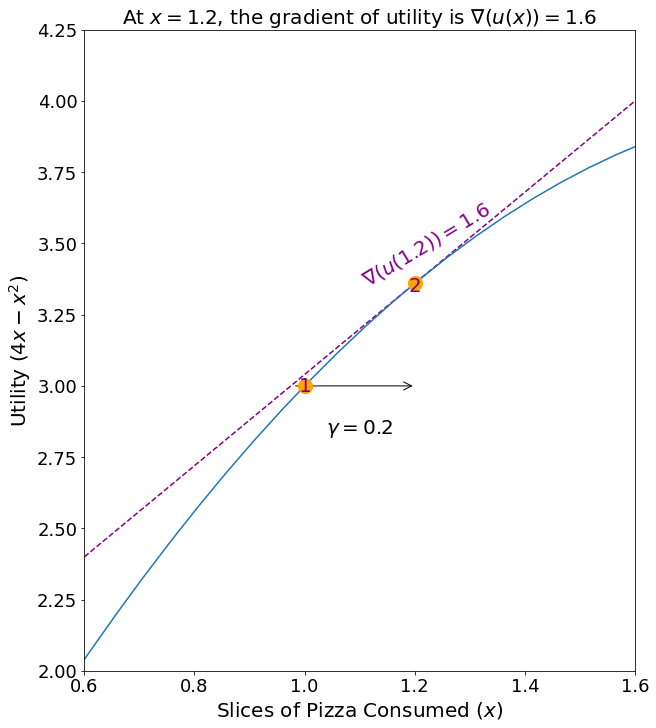

In [37]:
#@title The gradient of the utilty function at any point is the slope of the tangent line at that point.
from numpy import linspace
import matplotlib.pyplot as plt
import pandas as pd

# create pandas dataframe from a dictionary
plotDF = pd.DataFrame({"consumedPizza": linspace(0,5,100)})

plotDF["utility"] = 4 * plotDF.consumedPizza - plotDF.consumedPizza**2

## plot the results using matplotlib object-oriented interface
fig, ax = plt.subplots(figsize = [9,10], layout = "constrained")
ax.plot("consumedPizza","utility", data = plotDF)
ax.scatter(1,3, s= 200, marker = "o", c = "orange", zorder=2) 
ax.scatter(1.2,3.36, s= 200, marker = "o", c = "orange", zorder=2) 
ax.axhline(0, color = "red")
ax.set_xlim(0.6,1.6);
ax.set_ylim(2,4.25);
ax.set_xlabel("Slices of Pizza Consumed" + r" ($x$)", fontsize=20)
ax.set_ylabel("Utility" + r" ($4x-x^2$)", fontsize=20)
ax.set_title(r"At $x=1.2$, the gradient of utility is $\nabla\left(u(x)\right)= 1.6$", fontsize=20)
ax.text(x=1.1,y=3.35,s=r"$\nabla\left(u(1.2)\right) = 1.6$", color = "purple", rotation = 31, fontsize=20)
ax.text(x=1,y=3,s=r"$1$", color = "purple", ha = "center", va = "center", fontsize=20)
ax.text(x=1.2,y=3.35,s=r"$2$", color = "purple", ha = "center", va = "center", fontsize=20)
ax.text(x=1.1,y=2.85,s=r"$\gamma=0.2$", color = "black", ha = "center", va = "center", fontsize=20)
ax.axline(xy1 = (1.2,3.36), slope = 1.6, color = "purple", linestyle = "dashed", zorder = 0)
ax.annotate('', xy=(0.98,3), xytext=(1.2,3), xycoords = "data", 
            horizontalalignment='center', zorder = 1,
            arrowprops = dict(arrowstyle = "<-", color = "black"), fontsize=20)
ax.tick_params(labelsize=18)
plt.show()

__Step5 - Iterate Until Satisfied With Result:__ 

In [ ]:
maxSteps = 10 ## set to avoid looping forever
for _ in range(0,maxSteps):
    ## increment simulation number
    simNum = simNum + 1

    ## decide which x to try next
    if gradient >= 0:
        xValue = xValue + stepSize
    else:
        xValue = xValue - stepSize

    ## get variable values for new row
    utility = utilityFunction(xValue)
    gradient = utilityFunction_dx(xValue).item()
    newRow = pd.Series({"simNum": simNum,
                        "x": xValue,
                        "utility": utility,
                        "gradient": gradient})

    ## Append single new row to dataframe
    df = pd.concat([df, newRow.to_frame().T], ignore_index = True)

    ## break out of for loop is gradient val is sufficiently small
    if abs(gradient) < 0.1:
        break
      
df

In [ ]:
#@title Six steps to get to the point of maximum utility.
#| label: fig-hilltop
#| fig-cap: Six steps to get to the point of maximum utility.
#| echo: false
#| column: body
from numpy import linspace
import matplotlib.pyplot as plt
import pandas as pd

# create pandas dataframe from a dictionary
plotDF = pd.DataFrame({"consumedPizza": linspace(0,5,100)})

plotDF["utility"] = 4 * plotDF.consumedPizza - plotDF.consumedPizza**2

## plot the results using matplotlib object-oriented interface
fig, ax = plt.subplots(figsize = [4.5,3.75], layout = "constrained");
ax.plot("consumedPizza","utility", data = plotDF);
ax.scatter(df.x,df.utility, s= 200, marker = "o", c = "orange", zorder=2) ;
ax.axhline(0, color = "red");
ax.set_xlim(0.,3);
ax.set_ylim(0,5);
ax.set_xlabel("Slices of Pizza Consumed" + r" ($x$)");
ax.set_ylabel("Utility" + r" ($4x-x^2$)");

for index, row in df.iterrows():
    ax.text(x=row["x"],y=row["utility"],s=int(row["simNum"]), color = "purple", ha = "center", va = "center");

ax.annotate('Maximum Utility\nfound after\n 6 steps', xy=(6,4.7), xytext=(6,4.1), xycoords = "data",
           horizontalalignment='center', zorder = 1,
           arrowprops = dict(arrowstyle = "<-", color = "black"));
           
plt.show()

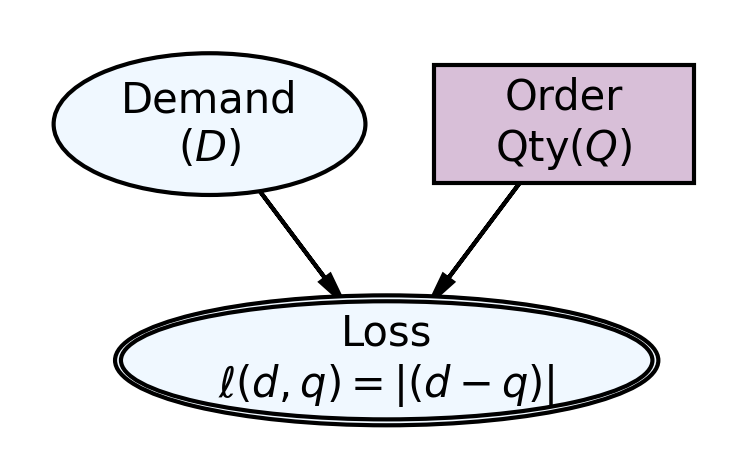

In [41]:
#@title Optimizing Actions Under Uncertainty
from functools import partial, partialmethod
import matplotlib.pyplot as plt
import daft   ### %pip install -U git+https://github.com/daft-dev/daft.git

class dag(daft.PGM):
    def __init__(self, *args, **kwargs):
        daft.PGM.__init__(self, *args, **kwargs)
    
    obsNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'cadetblue'})
    decNode = partialmethod(daft.PGM.add_node, aspect = 2.2, fontsize = 10, shape = "rectangle", plot_params = {'facecolor': 'thistle'})
    detNode = partialmethod(daft.PGM.add_node, aspect = 4.5, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNode = partialmethod(daft.PGM.add_node, scale = 1.2, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    detNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, alternate = True, plot_params = {'facecolor': 'aliceblue'})
    latNodeBig = partialmethod(daft.PGM.add_node, scale = 1.6, aspect = 2.2, fontsize = 10, plot_params = {'facecolor': 'aliceblue'})
    
pgm = dag(dpi = 300, alternate_style="outer")
pgm.latNode("d","Demand\n"+r"$(D)$",2,1)
pgm.decNode("q","Order\n" + r"Qty$(Q)$",3.5,1)
pgm.detNode("loss","Loss\n" + r"$\ell(d,q) = |(d-q)|$", 2.75,0)
pgm.add_edge("d","loss")
pgm.add_edge("q","loss")
pgm.show()

The statistical model is shown here:

$$
\begin{aligned}
D &\equiv \textrm{Daily demand for newspapers, and}\\
D &\sim \textrm{Binomial}(n=200,p=0.2).\\
Q &\equiv \textrm{Order quantity chosen by decision-maker, where}\\
Q &\in \{0, 1, 2, \ldots, 200\}.\\
\ell &\equiv \textrm{Quantification of the newsvendor's loss. Smaller is better.}\\
\ell(d,q) &= |(d-q)|.
\end{aligned}
$$

Recall our simulated data is in `newsDF` created in @sec-simUncertainty.

In [ ]:
newsDF

simulate representative samples of loss assuming order quantity is fixed at 40 (`lossForOQ40`) or 42 (`lossForOQ42`):

In [ ]:
## write loss function in Python
def lossFunction(d,q):
    loss = abs(d-q)  ## using jax version of abs 
    return loss

## convert from pandas series type to jax array
## all input arrays should be jax arrays for optimizing
demand = jnp.array(newsDF.demand)
## create partial loss function where samples of d are known
lossGivenQ = partial(lossFunction,d = demand)

## showcasing two ways of computing exp loss, 
## we will learn to prefer the 2nd form
newsDF["lossForOQ40"] = lossFunction(d = newsDF.demand, q = 40)
newsDF["lossForOQ42"] = lossGivenQ(q = 42)

newsDF ## show results

From just eyeballing the 2 additional loss columns, it is not clear which one is better.  There is no single number to summarize our dis-satisfaction with an order quantity; each column for each orqer quantity yields 100 measurements of dis-satisfaction. 

One way out of this mess is to use _expected utility_.  

In [ ]:
print("Expected Loss for q = 42: ",jnp.mean(lossGivenQ(q=42)))
print("Expected Loss for q = 44: ",jnp.mean(lossGivenQ(q=44)))

to say that order quantity of 42 is preferred due to smaller expected loss.

And more thoroughly, we can either plot expected loss as a function of order quantity or use gradient descent to find the optimal order quantity. 

In [ ]:
#@title Plotting expected loss to find the optimal order quantity of 40.
from numpy import linspace
import matplotlib.pyplot as plt
import pandas as pd

# initialize canvas and axes to plot on
## plot the results using matplotlib object-oriented interface
fig, ax = plt.subplots(figsize = [5,4], layout = "constrained");
ax.set_xlabel("Order Quantity" + r" ($q$)");
ax.set_ylabel("Expected Loss" + r" $\mathbb{E} \left(\ell(d,q)\right)$");

bestQ = 0
minLoss = float('inf')

for orderQty in range(25,50+1):
    expLoss = jnp.mean(lossGivenQ(q=orderQty))
    ax.scatter(orderQty,expLoss, s= 200, marker = "o", c = "orange");
    ## record to find minimum
    if expLoss < minLoss:
        minLoss = expLoss
        bestQ = orderQty

## place a purple star over the minimum
ax.scatter(bestQ,minLoss, s= 200, marker = "*", c = "purple");
plt.show();

### Using gradient descent
As opposed to trying every feasible order quantity, we can use gradient **descent** to get the same result.  Let's start our descent at $q=50$ to showcase taking steps in the negative direction.

In [49]:
# simulation parameters
stepSize = 1
maxSteps = 1000

# starting point
currentQ = 50. ## make float to avoid error

# expLossFunction
def expLossFun(q):
    expLoss = jnp.mean(lossGivenQ(q=q))
    return expLoss

# gradient of exp loss function
newsvGradient = grad(expLossFun)

# take steps towards optimum
for _ in range(0,maxSteps):
    gradientValue = newsvGradient(currentQ).item() #return just value
    ## break out of for loop is gradient val is sufficiently small
    if abs(gradientValue) < 0.1:
        break
    ## pick whether to increase or decrease order quantity
    ## NOTE: for minimizing steps are in direction of negative gradient
    if newsvGradient(currentQ) >= 0:
        ## if gradient is positive reduce q
        currentQ = currentQ - stepSize
    else:
        ## if gradient is negative increase q
        currentQ = currentQ + stepSize

# print optimum
print("The optimal order quantity is ", currentQ, " with expected loss of ", expLossFun(currentQ),".")

The optimal order quantity is  41.0  with expected loss of  4.5899997 .


Interestingly, our plot and gradient descent disagreed about the optimal order quantity $q^*$; our plotting exploration determined the optimal order quantity $q^* = 40$ and gradient descent determined $q^* = 41$.  @fig-newvOptPlot reveals why; the difference between expected loss with $q=40$ and $q=41$ is quite small.  Since the difference is less than the 0.1 we used as our stopping rule (i.e. `if abs(gradientValue) < 0.1: break`), gradient descent stops at $q=41$ and never continues on to $q=40$.

## Expected Utility Maximization Is Not Always Practical

Deviations between observed decision making under real-world uncertainty and behavior predicted by expected utility (EU) maximization are so frequently documented that EU (maximization) is only considered an approximation of a "good" or "rational" decision.  